In [141]:
from pylab import *
import matplotlib.patches as patches
import time

%matplotlib inline


plt.rcParams.update({'axes.titlesize': 'xx-large'})
plt.rcParams.update({'axes.labelsize': 'xx-large'})
plt.rcParams.update({'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large'})
plt.rcParams.update({'legend.fontsize': 'x-large'})


In [49]:
data_files = []
data_N = []
data_type = []
#data_files.append('data/regression_similarity-N=100-W=1700-rc=1e-15-170517.npz')
#data_files.append('data/regression_similarity-N=1000-W=1700-rc=1e-15-170517.npz')
data_files.append('data/regression_similarity-N=100-W=1700-rc=0.05-170517.npz')
data_N.append(100*100)
data_type.append(0)

data_files.append('data/regression_similarity-N=1000-W=1700-rc=0.05-170517.npz')
data_N.append(1000*1000)
data_type.append(0)


data_files.append('data/reg_outer_similarity-N=100-W=1700-rc=1e-15-170517.npz')
data_N.append(100*100)
data_type.append(2)

data_files.append('data/reg_outer_similarity-N=1000-W=1700-rc=1e-15-170517.npz')
data_N.append(1000*1000)
data_type.append(2)



data_files.append('data/reg_binding_similarity-N=1000-W=1700-170517.npz')
data_N.append(1000)
data_type.append(4)

data_files.append('data/reg_binding_similarity-N=10000-W=1700-170517.npz')
data_N.append(10000)
data_type.append(4)

data_files.append('data/reg_binding_similarity-N=100000-W=1700-170517.npz')
data_N.append(100000)
data_type.append(4)


#data_files.append('data/regression_diff_similarity-N=100-W=1700-rc=1e-15-170517.npz')
#data_files.append('data/regression_diff_similarity-N=1000-W=1700-rc=1e-15-170517.npz')
data_files.append('data/regression_diff_similarity-N=100-W=1700-rc=0.05-170517.npz')
data_N.append(100*100)
data_type.append(1)

data_files.append('data/regression_diff_similarity-N=1000-W=1700-rc=0.05-170517.npz')
data_N.append(1000*1000)
data_type.append(1)


data_files.append('data/reg_outer_diff_similarity-N=100-W=1700-rc=1e-15-170517.npz')
data_N.append(100*100)
data_type.append(3)

data_files.append('data/reg_outer_diff_similarity-N=1000-W=1700-rc=1e-15-170517.npz')
data_N.append(1000*1000)
data_type.append(3)


data_files.append('data/reg_binding_diff_similarity-N=1000-W=1700-170518.npz')
data_N.append(1000)
data_type.append(5)

data_files.append('data/reg_binding_diff_similarity-N=10000-W=1700-170517.npz')
data_N.append(10000)
data_type.append(5)

data_files.append('data/reg_binding_diff_similarity-N=100000-W=1700-170517.npz')
data_N.append(100000)
data_type.append(5)




In [50]:
h = []

for f in data_files:
    h.append(np.load(f))
    


In [128]:

uN = unique(data_N)
udt = unique(data_type)

cols_N = get_cmap('coolwarm', len(uN))

udt = unique(data_type)
cols_dt = get_cmap('Paired', 12)


In [129]:
len(udt)

6

0
2
4
1
3
figures/algorithm_comparison-nA=14-170518


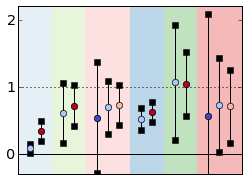

In [142]:
figure(figsize=(4,3))

c = 1
tt = 0
rx = 0



for i in range(len(h)):
    Nidx = np.nonzero(data_N[i] == uN)[0]
    if not tt == data_type[i]: 
        print tt
        rect_p = patches.Rectangle((rx, -0.5), c-rx, 3,
                                   facecolor=cols_dt(tt), 
                                   edgecolor="none",
                                   alpha=0.3)
        gca().add_patch(rect_p)
        
        tt = data_type[i]        
        rx=c
        c += 1

    
    plot([c, c], 
         [h[i]['test_mean'][-1] - h[i]['test_std'][-1], h[i]['test_mean'][-1] + h[i]['test_std'][-1]], 
          '-sk')
    plot([c, c], [h[i]['test_mean'][-1], h[i]['test_mean'][-1]], 'o', c=cols_N(Nidx)[0])#, mfc=cols_N(Nidx))

    c+= 1
    
rect_p = patches.Rectangle((rx, -0.5), c-rx, 3, 
                           facecolor=cols_dt(data_type[i]), 
                           edgecolor="none",
                           alpha=0.3)
gca().add_patch(rect_p)
rx=c
    
plot([0, c], [0, 0], 'k')
plot([0, c], [1, 1], ':k')

ylim([-0.3, 2.2])
yticks([0, 1, 2])
xticks([])

fname =  ('figures/algorithm_comparison-nA=' + str(len(h))
          + '-' + time.strftime('%y%m%d'))
print fname

plt.savefig(fname + '.png', transparent=True)
plt.savefig(fname + '.eps', transparent=True)

figures/comparison_legend-nA=14-170519


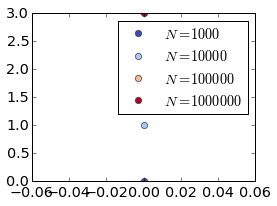

In [147]:
figure(figsize=(4,3))

for iN,N in enumerate(uN):
    plot(iN, 'o', mfc=cols_N(iN), label="$N=%i$" % N)
    
legend(numpoints=1)

fname =  ('figures/comparison_legend-nA=' + str(len(h))
          + '-' + time.strftime('%y%m%d'))
print fname

plt.savefig(fname + '.png', transparent=True)
plt.savefig(fname + '.eps', transparent=True)

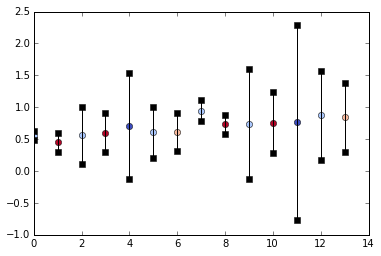

In [107]:
for i in range(len(h)):
    ttm = h[i]['test_mean'][-1] / h[i]['train_mean'][-1]
    Nidx = np.nonzero(data_N[i] == uN)[0]

    plot(i, ttm, 'o', c=cols_N(Nidx)[0])
    plot([i, i], 
         [ttm - h[i]['test_std'][-1], ttm + h[i]['test_std'][-1]], 
          '-sk')